In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Read in cleaned csv

In [2]:
df = pd.read_csv('cleaned.csv')

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,Competitor had better devices


# Function to evaluate results

In [4]:
## Function used to evaluate results
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

# Train-Test split

In [7]:
# Creating variables for the train-test split
y = df['Churn Value']
X = df.drop(columns = ['Churn Value', 'Churn Label', 'Churn Reason'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
6021,2371-JQHZZ,1,United States,California,Bakersfield,93307,"35.280113, -118.962329",35.280113,-118.962329,Male,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.00,2248.05
3404,2190-BCXEC,1,United States,California,Death Valley,92328,"36.27688, -117.033326",36.276880,-117.033326,Female,...,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),78.85,3126.85
5474,8404-GFGCZ,1,United States,California,Millville,96062,"40.531257, -122.148139",40.531257,-122.148139,Male,...,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,65.60,250.10
5515,3446-QDSZF,1,United States,California,Homewood,96141,"39.117018, -120.212535",39.117018,-120.212535,Female,...,No,No,No,Yes,No,Month-to-month,No,Credit card (automatic),55.50,227.35
6328,6096-EGVTU,1,United States,California,San Jose,95120,"37.186141, -121.843554",37.186141,-121.843554,Female,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,24.90,1595.50


In [8]:
y_train.head()

6021    0
3404    0
5474    0
5515    0
6328    0
Name: Churn Value, dtype: int64

# Feature Engineering

In [9]:
# Defining the feature engineering function to clean the data frame for analysis.
def feature_engineering(df):
    binary_cols = ['Senior Citizen','Gender', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
    binary_dict = {'No' : '0', 'Male' : '0', 'Female' : '1', 'Yes' : '1'}
    df = df.drop(columns=['Count', 'Country', 'State', 'City','Lat Long','Zip Code','CustomerID'])
    for i in binary_cols:
        df[i] = df[i].map(binary_dict)
        df[i] = df[i].astype(int) # Converts the types from obj to int
    ohe_cols = ["Multiple Lines","Internet Service","Online Security","Online Backup","Device Protection","Tech Support","Streaming TV","Streaming Movies","Contract","Payment Method"]
    for x in ohe_cols:
        df = pd.get_dummies(data = df, columns = [x] , prefix= x, drop_first=True)
    return df

In [10]:
# Applying feature eng function to X_train.
X_train = feature_engineering(X_train)
X_train.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
6021,35.280113,-118.962329,0,0,1,0,24,1,1,93.00,...,0,0,1,0,1,0,0,0,1,0
3404,36.276880,-117.033326,1,0,1,0,40,1,1,78.85,...,1,0,0,0,0,0,0,1,0,0
5474,40.531257,-122.148139,0,0,1,0,4,1,0,65.60,...,0,0,1,0,0,0,0,0,1,0
5515,39.117018,-120.212535,1,0,0,0,4,1,0,55.50,...,0,0,1,0,0,0,0,1,0,0
6328,37.186141,-121.843554,1,0,1,1,64,1,0,24.90,...,0,1,0,1,0,1,0,0,0,1


In [11]:
# Defining the feature columns which are conveniently the x_train columns.
feature_cols = list(X_train.columns)
feature_cols

['Latitude',
 'Longitude',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Paperless Billing',
 'Monthly Charges',
 'Total Charges',
 'Multiple Lines_No phone service',
 'Multiple Lines_Yes',
 'Internet Service_Fiber optic',
 'Internet Service_No',
 'Online Security_No internet service',
 'Online Security_Yes',
 'Online Backup_No internet service',
 'Online Backup_Yes',
 'Device Protection_No internet service',
 'Device Protection_Yes',
 'Tech Support_No internet service',
 'Tech Support_Yes',
 'Streaming TV_No internet service',
 'Streaming TV_Yes',
 'Streaming Movies_No internet service',
 'Streaming Movies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'Payment Method_Credit card (automatic)',
 'Payment Method_Electronic check',
 'Payment Method_Mailed check']

# Logistic Regression - Base model

In [12]:
# Defining the logistic regression as lr for short.
lr = LogisticRegression(random_state=10, max_iter=1000)

In [13]:
# Fitting this to X & y train
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=10)

In [14]:
# Store the results in two columns
X_train[['prob_not_churn', 'prob_churn']] = lr.predict_proba(X_train)

In [15]:
# Check progress
X_train.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_not_churn,prob_churn
6021,35.280113,-118.962329,0,0,1,0,24,1,1,93.00,...,1,0,1,0,0,0,1,0,0.275853,0.724147
3404,36.276880,-117.033326,1,0,1,0,40,1,1,78.85,...,0,0,0,0,0,1,0,0,0.702186,0.297814
5474,40.531257,-122.148139,0,0,1,0,4,1,0,65.60,...,1,0,0,0,0,0,1,0,0.415106,0.584894
5515,39.117018,-120.212535,1,0,0,0,4,1,0,55.50,...,1,0,0,0,0,1,0,0,0.634202,0.365798
6328,37.186141,-121.843554,1,0,1,1,64,1,0,24.90,...,0,1,0,1,0,0,0,1,0.998405,0.001595


In [16]:
# Get a prediction by setting a cutoff point
cutoff = .55
X_train['pred'] = np.where(X_train['prob_churn'] > cutoff, 1, 0)

In [17]:
X_train.head(20)

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_not_churn,prob_churn,pred
6021,35.280113,-118.962329,0,0,1,0,24,1,1,93.00,...,0,1,0,0,0,1,0,0.275853,0.724147,1
3404,36.276880,-117.033326,1,0,1,0,40,1,1,78.85,...,0,0,0,0,1,0,0,0.702186,0.297814,0
5474,40.531257,-122.148139,0,0,1,0,4,1,0,65.60,...,0,0,0,0,0,1,0,0.415106,0.584894,1
5515,39.117018,-120.212535,1,0,0,0,4,1,0,55.50,...,0,0,0,0,1,0,0,0.634202,0.365798,0
6328,37.186141,-121.843554,1,0,1,1,64,1,0,24.90,...,1,0,1,0,0,0,1,0.998405,0.001595,0
5275,40.342928,-124.063329,0,1,1,0,69,1,1,95.35,...,0,1,0,0,0,0,0,0.698935,0.301065,0
1323,34.037037,-118.705803,1,1,0,0,2,1,1,79.60,...,0,1,0,0,0,1,0,0.215543,0.784457,1
6731,34.066303,-118.435479,0,1,0,0,16,1,1,78.75,...,0,1,0,0,0,1,0,0.334253,0.665747,1
5922,33.429488,-117.609432,1,1,0,0,67,1,1,92.45,...,0,0,0,1,0,0,0,0.958734,0.041266,0
6755,34.044271,-118.185237,1,0,1,1,72,0,0,53.65,...,0,1,0,1,1,0,0,0.996476,0.003524,0


In [18]:
X_train['pred'].value_counts()

0    4556
1    1069
Name: pred, dtype: int64

# Evaluate base model on Train

In [19]:
# Evaluate results on train data
get_results(y_train, X_train['pred'])

The confusion matrix for your predictions is:
[[3827  324]
 [ 729  745]] 

The accuracy of your model is: 0.8128
The recall of your model is: 0.505427408412483
The precision of your model is: 0.696913002806361
The F1-score of your model is: 0.5859221392056626


In [20]:
# Classification report on Train
print(metrics.classification_report(y_train, X_train['pred']))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4151
           1       0.70      0.51      0.59      1474

    accuracy                           0.81      5625
   macro avg       0.77      0.71      0.73      5625
weighted avg       0.80      0.81      0.80      5625



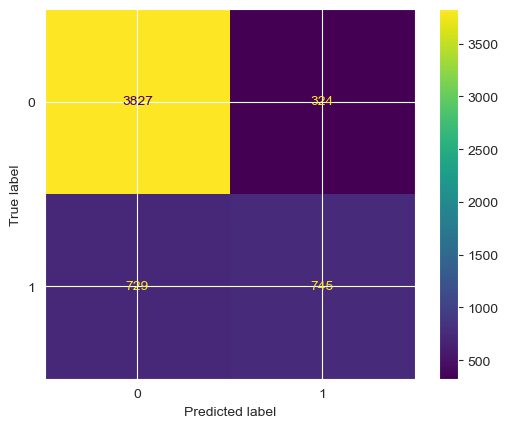

In [21]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train,X_train['pred'])).plot()
plt.show()
# Note the defualt colour scheme is not ideal and using a more basic representation is what we will use in the future.

# Predict and evaluate on Test

In [22]:
X_test = feature_engineering(X_test)

In [23]:
X_test.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
2476,37.244307,-119.470256,1,0,1,0,42,1,0,25.25,...,0,1,0,1,0,0,1,0,1,0
6773,33.890853,-118.297967,0,0,0,0,43,0,0,44.15,...,1,0,0,0,1,1,0,0,1,0
6116,36.600193,-120.153393,1,0,0,0,27,1,1,89.20,...,1,0,0,0,1,0,0,0,1,0
3047,40.021787,-122.127576,0,0,0,0,65,1,1,19.55,...,0,1,0,1,0,0,1,1,0,0
4092,38.683605,-120.811852,1,0,0,0,29,1,1,71.00,...,0,0,1,0,1,1,0,1,0,0


In [24]:
# Store the results in two columns
X_test[['prob_not_churn', 'prob_churn']] = lr.predict_proba(X_test)

In [25]:
# Check progress
X_test.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_not_churn,prob_churn
2476,37.244307,-119.470256,1,0,1,0,42,1,0,25.25,...,0,1,0,0,1,0,1,0,0.978067,0.021933
6773,33.890853,-118.297967,0,0,0,0,43,0,0,44.15,...,0,0,1,1,0,0,1,0,0.917507,0.082493
6116,36.600193,-120.153393,1,0,0,0,27,1,1,89.20,...,0,0,1,0,0,0,1,0,0.559307,0.440693
3047,40.021787,-122.127576,0,0,0,0,65,1,1,19.55,...,0,1,0,0,1,1,0,0,0.997083,0.002917
4092,38.683605,-120.811852,1,0,0,0,29,1,1,71.00,...,1,0,1,1,0,1,0,0,0.763053,0.236947


In [26]:
# Get a prediction by setting a cutoff point
cutoff = .55
X_test['pred'] = np.where(X_test['prob_churn'] > cutoff, 1, 0)
X_test.head(20)

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_not_churn,prob_churn,pred
2476,37.244307,-119.470256,1,0,1,0,42,1,0,25.25,...,1,0,0,1,0,1,0,0.978067,0.021933,0
6773,33.890853,-118.297967,0,0,0,0,43,0,0,44.15,...,0,1,1,0,0,1,0,0.917507,0.082493,0
6116,36.600193,-120.153393,1,0,0,0,27,1,1,89.20,...,0,1,0,0,0,1,0,0.559307,0.440693,0
3047,40.021787,-122.127576,0,0,0,0,65,1,1,19.55,...,1,0,0,1,1,0,0,0.997083,0.002917,0
4092,38.683605,-120.811852,1,0,0,0,29,1,1,71.00,...,0,1,1,0,1,0,0,0.763053,0.236947,0
3218,34.122671,-118.112911,0,0,0,1,32,1,0,20.50,...,1,0,0,1,0,0,1,0.995974,0.004026,0
3768,37.776718,-122.495781,1,0,1,0,71,1,0,25.00,...,1,0,0,1,0,0,0,0.996797,0.003203,0
3463,33.739412,-117.173334,1,0,0,0,19,1,0,20.25,...,1,0,1,0,1,0,0,0.955256,0.044744,0
3414,34.256500,-117.193350,1,0,0,0,33,1,0,59.40,...,0,0,1,0,0,1,0,0.940812,0.059188,0
1192,37.609095,-121.263381,1,0,0,0,3,1,0,85.80,...,0,1,0,0,0,1,0,0.448282,0.551718,1


In [27]:
X_test['pred'].value_counts()

0    1134
1     273
Name: pred, dtype: int64

In [28]:
# Evaluate results on Test data
get_results(y_test, X_test['pred'])

The confusion matrix for your predictions is:
[[938  74]
 [196 199]] 

The accuracy of your model is: 0.8081023454157783
The recall of your model is: 0.5037974683544304
The precision of your model is: 0.7289377289377289
The F1-score of your model is: 0.5958083832335328


In [29]:
# Classification report on Test
print(metrics.classification_report(y_test, X_test['pred']))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1012
           1       0.73      0.50      0.60       395

    accuracy                           0.81      1407
   macro avg       0.78      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



# Model 2 - With Scaling
Scaling X_train and X_test feature columns

In [32]:
# setting up the standard scalar function and using it to transform X_train
st_scaler = StandardScaler()
X_train_fitted = st_scaler.fit_transform(X_train[feature_cols])

In [33]:
X_train_scaled = pd.DataFrame(X_train_fitted, columns = feature_cols)

In [34]:
X_train_scaled.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,-0.410792,0.393461,-0.986053,-0.44047,1.037872,-0.551266,-0.335339,0.330528,0.833233,0.943953,...,-0.642345,-0.526819,1.273726,-0.526819,1.256619,-0.518272,-0.560856,-0.530397,1.419320,-0.543861
1,-0.005813,1.290412,1.014144,-0.44047,1.037872,-0.551266,0.316564,0.330528,0.833233,0.474005,...,1.556796,-0.526819,-0.785098,-0.526819,-0.795786,-0.518272,-0.560856,1.885380,-0.704563,-0.543861
2,1.722708,-1.087882,-0.986053,-0.44047,1.037872,-0.551266,-1.150218,0.330528,-1.200145,0.033947,...,-0.642345,-0.526819,1.273726,-0.526819,-0.795786,-0.518272,-0.560856,-0.530397,1.419320,-0.543861
3,1.148113,-0.187862,1.014144,-0.44047,-0.963510,-0.551266,-1.150218,0.330528,-1.200145,-0.301494,...,-0.642345,-0.526819,1.273726,-0.526819,-0.795786,-0.518272,-0.560856,1.885380,-0.704563,-0.543861
4,0.363613,-0.946256,1.014144,-0.44047,1.037872,1.814006,1.294419,0.330528,-1.200145,-1.317778,...,-0.642345,1.898186,-0.785098,1.898186,-0.795786,1.929487,-0.560856,-0.530397,-0.704563,1.838706


In [35]:
# Same as above but for X_test this time
X_test_fitted = st_scaler.transform(X_test[feature_cols])

In [36]:
X_test_scaled = pd.DataFrame(X_test_fitted, columns = feature_cols)

In [37]:
X_test_scaled.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0.387245,0.157284,1.014144,-0.44047,1.037872,-0.551266,0.398052,0.330528,-1.200145,-1.306154,...,-0.642345,1.898186,-0.785098,1.898186,-0.795786,-0.518272,1.782989,-0.530397,1.419320,-0.543861
1,-0.975237,0.702377,-0.986053,-0.44047,-0.963510,-0.551266,0.438796,-3.025464,-1.200145,-0.678449,...,1.556796,-0.526819,-0.785098,-0.526819,1.256619,1.929487,-0.560856,-0.530397,1.419320,-0.543861
2,0.125547,-0.160362,1.014144,-0.44047,-0.963510,-0.551266,-0.213107,0.330528,0.833233,0.817748,...,1.556796,-0.526819,-0.785098,-0.526819,1.256619,-0.518272,-0.560856,-0.530397,1.419320,-0.543861
3,1.515714,-1.078321,-0.986053,-0.44047,-0.963510,-0.551266,1.335163,0.330528,0.833233,-1.495462,...,-0.642345,1.898186,-0.785098,1.898186,-0.795786,-0.518272,1.782989,1.885380,-0.704563,-0.543861
4,0.972021,-0.466533,1.014144,-0.44047,-0.963510,-0.551266,-0.131619,0.330528,0.833233,0.213291,...,-0.642345,-0.526819,1.273726,-0.526819,1.256619,1.929487,-0.560856,1.885380,-0.704563,-0.543861


Fit model on scaled training data

In [38]:
# Fitting for the newly scaled X_train_scaled we just made.
lr = LogisticRegression(random_state=10, max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=10)

In [39]:
# Store the results in two columns
X_train[['s_prob_not_churn', 's_prob_churn']] = lr.predict_proba(X_train_scaled)
# Check progress
X_train.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_not_churn,prob_churn,pred,s_prob_not_churn,s_prob_churn
6021,35.280113,-118.962329,0,0,1,0,24,1,1,93.00,...,0,0,0,1,0,0.275853,0.724147,1,0.261920,0.738080
3404,36.276880,-117.033326,1,0,1,0,40,1,1,78.85,...,0,0,1,0,0,0.702186,0.297814,0,0.677542,0.322458
5474,40.531257,-122.148139,0,0,1,0,4,1,0,65.60,...,0,0,0,1,0,0.415106,0.584894,1,0.416686,0.583314
5515,39.117018,-120.212535,1,0,0,0,4,1,0,55.50,...,0,0,1,0,0,0.634202,0.365798,0,0.654561,0.345439
6328,37.186141,-121.843554,1,0,1,1,64,1,0,24.90,...,1,0,0,0,1,0.998405,0.001595,0,0.997801,0.002199


In [40]:
# Get a prediction by setting a cutoff point
cutoff = .55
X_train['s_pred'] = np.where(X_train['s_prob_churn'] > cutoff, 1, 0)
X_train.head(20)

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_not_churn,prob_churn,pred,s_prob_not_churn,s_prob_churn,s_pred
6021,35.280113,-118.962329,0,0,1,0,24,1,1,93.00,...,0,0,1,0,0.275853,0.724147,1,0.261920,0.738080,1
3404,36.276880,-117.033326,1,0,1,0,40,1,1,78.85,...,0,1,0,0,0.702186,0.297814,0,0.677542,0.322458,0
5474,40.531257,-122.148139,0,0,1,0,4,1,0,65.60,...,0,0,1,0,0.415106,0.584894,1,0.416686,0.583314,1
5515,39.117018,-120.212535,1,0,0,0,4,1,0,55.50,...,0,1,0,0,0.634202,0.365798,0,0.654561,0.345439,0
6328,37.186141,-121.843554,1,0,1,1,64,1,0,24.90,...,0,0,0,1,0.998405,0.001595,0,0.997801,0.002199,0
5275,40.342928,-124.063329,0,1,1,0,69,1,1,95.35,...,0,0,0,0,0.698935,0.301065,0,0.673431,0.326569,0
1323,34.037037,-118.705803,1,1,0,0,2,1,1,79.60,...,0,0,1,0,0.215543,0.784457,1,0.227623,0.772377,1
6731,34.066303,-118.435479,0,1,0,0,16,1,1,78.75,...,0,0,1,0,0.334253,0.665747,1,0.335688,0.664312,1
5922,33.429488,-117.609432,1,1,0,0,67,1,1,92.45,...,1,0,0,0,0.958734,0.041266,0,0.968718,0.031282,0
6755,34.044271,-118.185237,1,0,1,1,72,0,0,53.65,...,1,1,0,0,0.996476,0.003524,0,0.997364,0.002636,0


In [41]:
# Predict on test
X_test[['s_prob_not_churn', 's_prob_churn']] = lr.predict_proba(X_test_scaled)

In [42]:
cutoff = .55
X_test['s_pred'] = np.where(X_test['s_prob_churn'] > cutoff, 1, 0)
X_test.head(20)

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_not_churn,prob_churn,pred,s_prob_not_churn,s_prob_churn,s_pred
2476,37.244307,-119.470256,1,0,1,0,42,1,0,25.25,...,1,0,1,0,0.978067,0.021933,0,0.980746,0.019254,0
6773,33.890853,-118.297967,0,0,0,0,43,0,0,44.15,...,0,0,1,0,0.917507,0.082493,0,0.916425,0.083575,0
6116,36.600193,-120.153393,1,0,0,0,27,1,1,89.20,...,0,0,1,0,0.559307,0.440693,0,0.517452,0.482548,0
3047,40.021787,-122.127576,0,0,0,0,65,1,1,19.55,...,1,1,0,0,0.997083,0.002917,0,0.997205,0.002795,0
4092,38.683605,-120.811852,1,0,0,0,29,1,1,71.00,...,0,1,0,0,0.763053,0.236947,0,0.797535,0.202465,0
3218,34.122671,-118.112911,0,0,0,1,32,1,0,20.50,...,1,0,0,1,0.995974,0.004026,0,0.996960,0.003040,0
3768,37.776718,-122.495781,1,0,1,0,71,1,0,25.00,...,1,0,0,0,0.996797,0.003203,0,0.996667,0.003333,0
3463,33.739412,-117.173334,1,0,0,0,19,1,0,20.25,...,0,1,0,0,0.955256,0.044744,0,0.952896,0.047104,0
3414,34.256500,-117.193350,1,0,0,0,33,1,0,59.40,...,0,0,1,0,0.940812,0.059188,0,0.934118,0.065882,0
1192,37.609095,-121.263381,1,0,0,0,3,1,0,85.80,...,0,0,1,0,0.448282,0.551718,1,0.421009,0.578991,1


# Evaluate scaled model

In [43]:
# Evaluate on train
get_results(y_train, X_train['s_pred'])

The confusion matrix for your predictions is:
[[3829  322]
 [ 726  748]] 

The accuracy of your model is: 0.8136888888888889
The recall of your model is: 0.5074626865671642
The precision of your model is: 0.6990654205607477
The F1-score of your model is: 0.5880503144654088


In [44]:
# Evaluate on test
get_results(y_test, X_test['s_pred'])

The confusion matrix for your predictions is:
[[935  77]
 [193 202]] 

The accuracy of your model is: 0.8081023454157783
The recall of your model is: 0.5113924050632911
The precision of your model is: 0.7240143369175627
The F1-score of your model is: 0.5994065281899109


In [45]:
X_train.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_not_churn,prob_churn,pred,s_prob_not_churn,s_prob_churn,s_pred
6021,35.280113,-118.962329,0,0,1,0,24,1,1,93.00,...,0,0,1,0,0.275853,0.724147,1,0.261920,0.738080,1
3404,36.276880,-117.033326,1,0,1,0,40,1,1,78.85,...,0,1,0,0,0.702186,0.297814,0,0.677542,0.322458,0
5474,40.531257,-122.148139,0,0,1,0,4,1,0,65.60,...,0,0,1,0,0.415106,0.584894,1,0.416686,0.583314,1
5515,39.117018,-120.212535,1,0,0,0,4,1,0,55.50,...,0,1,0,0,0.634202,0.365798,0,0.654561,0.345439,0
6328,37.186141,-121.843554,1,0,1,1,64,1,0,24.90,...,0,0,0,1,0.998405,0.001595,0,0.997801,0.002199,0


# Model 3 - with scaling (long/lat removed)

In [46]:
# Setting up the many columns we wish to scale (excluding long/lat as they mess up the scaling and have negligible impact on the model as a whole.
st_scaler = StandardScaler()
scaled_cols = [ 'Gender',
                'Senior Citizen',
                'Partner',
                'Dependents',
                'Tenure Months',
                'Phone Service',
                'Paperless Billing',
                'Monthly Charges',
                'Total Charges',
                'Multiple Lines_No phone service',
                'Multiple Lines_Yes',
                'Internet Service_Fiber optic',
                'Internet Service_No',
                'Online Security_No internet service',
                'Online Security_Yes',
                'Online Backup_No internet service',
                'Online Backup_Yes',
                'Device Protection_No internet service',
                'Device Protection_Yes',
                'Tech Support_No internet service',
                'Tech Support_Yes',
                'Streaming TV_No internet service',
                'Streaming TV_Yes',
                'Streaming Movies_No internet service',
                'Streaming Movies_Yes',
                'Contract_One year',
                'Contract_Two year',
                'Payment Method_Credit card (automatic)',
                'Payment Method_Electronic check',
                'Payment Method_Mailed check']
# Applying the scalar function to X_train (again) using the specified columns now.
X_train_fitted2 = st_scaler.fit_transform(X_train[scaled_cols])
X_train_scaled2 = pd.DataFrame(X_train_fitted2, columns= scaled_cols)
X_train_scaled2.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No phone service,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,-0.986053,-0.44047,1.037872,-0.551266,-0.335339,0.330528,0.833233,0.943953,-0.007413,-0.330528,...,-0.642345,-0.526819,1.273726,-0.526819,1.256619,-0.518272,-0.560856,-0.530397,1.419320,-0.543861
1,1.014144,-0.44047,1.037872,-0.551266,0.316564,0.330528,0.833233,0.474005,0.381182,-0.330528,...,1.556796,-0.526819,-0.785098,-0.526819,-0.795786,-0.518272,-0.560856,1.885380,-0.704563,-0.543861
2,-0.986053,-0.44047,1.037872,-0.551266,-1.150218,0.330528,-1.200145,0.033947,-0.890882,-0.330528,...,-0.642345,-0.526819,1.273726,-0.526819,-0.795786,-0.518272,-0.560856,-0.530397,1.419320,-0.543861
3,1.014144,-0.44047,-0.963510,-0.551266,-1.150218,0.330528,-1.200145,-0.301494,-0.900941,-0.330528,...,-0.642345,-0.526819,1.273726,-0.526819,-0.795786,-0.518272,-0.560856,1.885380,-0.704563,-0.543861
4,1.014144,-0.44047,1.037872,1.814006,1.294419,0.330528,-1.200145,-1.317778,-0.295962,-0.330528,...,-0.642345,1.898186,-0.785098,1.898186,-0.795786,1.929487,-0.560856,-0.530397,-0.704563,1.838706


In [47]:
# Same as above for test
X_test_fitted2 = st_scaler.transform(X_test[scaled_cols])
X_test_scaled2 = pd.DataFrame(X_test_fitted2, columns=scaled_cols)
X_test_scaled2.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No phone service,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1.014144,-0.44047,1.037872,-0.551266,0.398052,0.330528,-1.200145,-1.306154,-0.511440,-0.330528,...,-0.642345,1.898186,-0.785098,1.898186,-0.795786,-0.518272,1.782989,-0.530397,1.419320,-0.543861
1,-0.986053,-0.44047,-0.963510,-0.551266,0.438796,-3.025464,-1.200145,-0.678449,-0.147476,3.025464,...,1.556796,-0.526819,-0.785098,-0.526819,1.256619,1.929487,-0.560856,-0.530397,1.419320,-0.543861
2,1.014144,-0.44047,-0.963510,-0.551266,-0.213107,0.330528,0.833233,0.817748,0.052526,-0.330528,...,1.556796,-0.526819,-0.785098,-0.526819,1.256619,-0.518272,-0.560856,-0.530397,1.419320,-0.543861
3,-0.986053,-0.44047,-0.963510,-0.551266,1.335163,0.330528,0.833233,-1.495462,-0.462601,-0.330528,...,-0.642345,1.898186,-0.785098,1.898186,-0.795786,-0.518272,1.782989,1.885380,-0.704563,-0.543861
4,1.014144,-0.44047,-0.963510,-0.551266,-0.131619,0.330528,0.833233,0.213291,-0.081678,-0.330528,...,-0.642345,-0.526819,1.273726,-0.526819,1.256619,1.929487,-0.560856,1.885380,-0.704563,-0.543861


In [48]:
# Apply Logistic regression
lr = LogisticRegression(random_state=10, max_iter=1000)
lr.fit(X_train_scaled2, y_train)
# Store the results in two columns
X_train[['s2_prob_not_churn', 's2_prob_churn']] = lr.predict_proba(X_train_scaled2)
# Check progress
X_train.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Payment Method_Electronic check,Payment Method_Mailed check,prob_not_churn,prob_churn,pred,s_prob_not_churn,s_prob_churn,s_pred,s2_prob_not_churn,s2_prob_churn
6021,35.280113,-118.962329,0,0,1,0,24,1,1,93.00,...,1,0,0.275853,0.724147,1,0.261920,0.738080,1,0.262052,0.737948
3404,36.276880,-117.033326,1,0,1,0,40,1,1,78.85,...,0,0,0.702186,0.297814,0,0.677542,0.322458,0,0.667515,0.332485
5474,40.531257,-122.148139,0,0,1,0,4,1,0,65.60,...,1,0,0.415106,0.584894,1,0.416686,0.583314,1,0.413229,0.586771
5515,39.117018,-120.212535,1,0,0,0,4,1,0,55.50,...,0,0,0.634202,0.365798,0,0.654561,0.345439,0,0.647993,0.352007
6328,37.186141,-121.843554,1,0,1,1,64,1,0,24.90,...,0,1,0.998405,0.001595,0,0.997801,0.002199,0,0.997852,0.002148


In [49]:
# Get a prediction by setting a cutoff point
cutoff = .55
X_train['s2_pred'] = np.where(X_train['s2_prob_churn'] > cutoff, 1, 0)
X_train.head(20)

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Payment Method_Mailed check,prob_not_churn,prob_churn,pred,s_prob_not_churn,s_prob_churn,s_pred,s2_prob_not_churn,s2_prob_churn,s2_pred
6021,35.280113,-118.962329,0,0,1,0,24,1,1,93.00,...,0,0.275853,0.724147,1,0.261920,0.738080,1,0.262052,0.737948,1
3404,36.276880,-117.033326,1,0,1,0,40,1,1,78.85,...,0,0.702186,0.297814,0,0.677542,0.322458,0,0.667515,0.332485,0
5474,40.531257,-122.148139,0,0,1,0,4,1,0,65.60,...,0,0.415106,0.584894,1,0.416686,0.583314,1,0.413229,0.586771,1
5515,39.117018,-120.212535,1,0,0,0,4,1,0,55.50,...,0,0.634202,0.365798,0,0.654561,0.345439,0,0.647993,0.352007,0
6328,37.186141,-121.843554,1,0,1,1,64,1,0,24.90,...,1,0.998405,0.001595,0,0.997801,0.002199,0,0.997852,0.002148,0
5275,40.342928,-124.063329,0,1,1,0,69,1,1,95.35,...,0,0.698935,0.301065,0,0.673431,0.326569,0,0.677000,0.323000,0
1323,34.037037,-118.705803,1,1,0,0,2,1,1,79.60,...,0,0.215543,0.784457,1,0.227623,0.772377,1,0.229417,0.770583,1
6731,34.066303,-118.435479,0,1,0,0,16,1,1,78.75,...,0,0.334253,0.665747,1,0.335688,0.664312,1,0.337045,0.662955,1
5922,33.429488,-117.609432,1,1,0,0,67,1,1,92.45,...,0,0.958734,0.041266,0,0.968718,0.031282,0,0.968722,0.031278,0
6755,34.044271,-118.185237,1,0,1,1,72,0,0,53.65,...,0,0.996476,0.003524,0,0.997364,0.002636,0,0.997371,0.002629,0


In [50]:
# Predict on test
X_test[['s2_prob_not_churn', 's2_prob_churn']] = lr.predict_proba(X_test_scaled2)
cutoff = .55
X_test['s2_pred'] = np.where(X_test['s2_prob_churn'] > cutoff, 1, 0)
X_test.head(20)

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Payment Method_Mailed check,prob_not_churn,prob_churn,pred,s_prob_not_churn,s_prob_churn,s_pred,s2_prob_not_churn,s2_prob_churn,s2_pred
2476,37.244307,-119.470256,1,0,1,0,42,1,0,25.25,...,0,0.978067,0.021933,0,0.980746,0.019254,0,0.980400,0.019600,0
6773,33.890853,-118.297967,0,0,0,0,43,0,0,44.15,...,0,0.917507,0.082493,0,0.916425,0.083575,0,0.916956,0.083044,0
6116,36.600193,-120.153393,1,0,0,0,27,1,1,89.20,...,0,0.559307,0.440693,0,0.517452,0.482548,0,0.517758,0.482242,0
3047,40.021787,-122.127576,0,0,0,0,65,1,1,19.55,...,0,0.997083,0.002917,0,0.997205,0.002795,0,0.997173,0.002827,0
4092,38.683605,-120.811852,1,0,0,0,29,1,1,71.00,...,0,0.763053,0.236947,0,0.797535,0.202465,0,0.795284,0.204716,0
3218,34.122671,-118.112911,0,0,0,1,32,1,0,20.50,...,1,0.995974,0.004026,0,0.996960,0.003040,0,0.996960,0.003040,0
3768,37.776718,-122.495781,1,0,1,0,71,1,0,25.00,...,0,0.996797,0.003203,0,0.996667,0.003333,0,0.996746,0.003254,0
3463,33.739412,-117.173334,1,0,0,0,19,1,0,20.25,...,0,0.955256,0.044744,0,0.952896,0.047104,0,0.952397,0.047603,0
3414,34.256500,-117.193350,1,0,0,0,33,1,0,59.40,...,0,0.940812,0.059188,0,0.934118,0.065882,0,0.933174,0.066826,0
1192,37.609095,-121.263381,1,0,0,0,3,1,0,85.80,...,0,0.448282,0.551718,1,0.421009,0.578991,1,0.422214,0.577786,1


# Evaluation

We thought that the longitude and latitude didn't have any effect on the model, and so we removed them from the model, and we expected to obtain the same results and below shows we did. Thus position has no effect on the model.

In [51]:
# Evaluate on train
get_results(y_train, X_train['s2_pred'])

The confusion matrix for your predictions is:
[[3827  324]
 [ 721  753]] 

The accuracy of your model is: 0.8142222222222222
The recall of your model is: 0.510854816824966
The precision of your model is: 0.6991643454038997
The F1-score of your model is: 0.5903567228537827


In [52]:
# Evaluate on test
get_results(y_test, X_test['s2_pred'])

The confusion matrix for your predictions is:
[[937  75]
 [195 200]] 

The accuracy of your model is: 0.8081023454157783
The recall of your model is: 0.5063291139240507
The precision of your model is: 0.7272727272727273
The F1-score of your model is: 0.5970149253731343


# V I F Model

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Defining a function to calculate the VIF with a very creative name.
def calculate_vif(X, thresh = 5):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [55]:
# Apply VIF on X_train's feature cols. 
X_train_vif = calculate_vif(X_train[feature_cols])

C:\Users\bradl\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'Internet Service_No' at index: 14
dropping 'Online Security_No internet service' at index: 14
dropping 'Online Backup_No internet service' at index: 15
dropping 'Device Protection_No internet service' at index: 16
dropping 'Tech Support_No internet service' at index: 17
dropping 'Streaming TV_No internet service' at index: 18
dropping 'Phone Service' at index: 7
dropping 'Monthly Charges' at index: 8
dropping 'Longitude' at index: 1
dropping 'Total Charges' at index: 7
dropping 'Latitude' at index: 0
dropping 'Tenure Months' at index: 4
Remaining variables:
Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Paperless Billing', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_Fiber optic',
       'Online Security_Yes', 'Online Backup_Yes', 'Device Protection_Yes',
       'Tech Support_Yes', 'Streaming TV_Yes',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_One year', 'Contract_Two year',

In [56]:
vif_cols = list(X_train_vif.columns)

In [57]:
lr = LogisticRegression(random_state=10, max_iter=1000)
lr.fit(X_train_vif, y_train)

LogisticRegression(max_iter=1000, random_state=10)

In [58]:
X_train[['VIF_prob_not_churn', 'VIF_prob_churn']] = lr.predict_proba(X_train_vif)

In [59]:
cutoff = .55
X_train['VIF_pred'] = np.where(X_train['VIF_prob_churn'] > cutoff, 1, 0)

In [60]:
# Predict ON TEST
X_test[['VIF_prob_not_churn', 'VIF_prob_churn']] = lr.predict_proba(X_test[vif_cols])
cutoff = .55
X_test['VIF_pred'] = np.where(X_test['VIF_prob_churn'] > cutoff, 1, 0)

In [61]:
get_results(y_train, X_train['VIF_pred'])

The confusion matrix for your predictions is:
[[3807  344]
 [ 786  688]] 

The accuracy of your model is: 0.7991111111111111
The recall of your model is: 0.46675712347354137
The precision of your model is: 0.6666666666666666
The F1-score of your model is: 0.5490822027134876


In [62]:
# Evaluate on test
get_results(y_test, X_test['VIF_pred'])

The confusion matrix for your predictions is:
[[913  99]
 [196 199]] 

The accuracy of your model is: 0.7903340440653873
The recall of your model is: 0.5037974683544304
The precision of your model is: 0.6677852348993288
The F1-score of your model is: 0.5743145743145744


## Evaluation
Overall not an amazing model from what we have calculated using a random forrest method. (on the next ipynb file)